Explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]


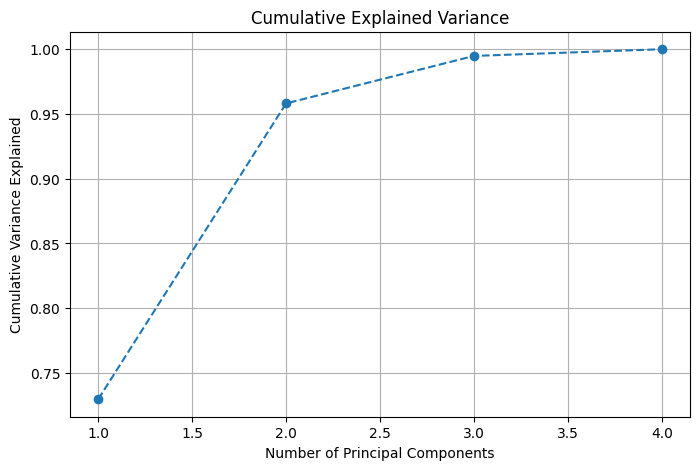

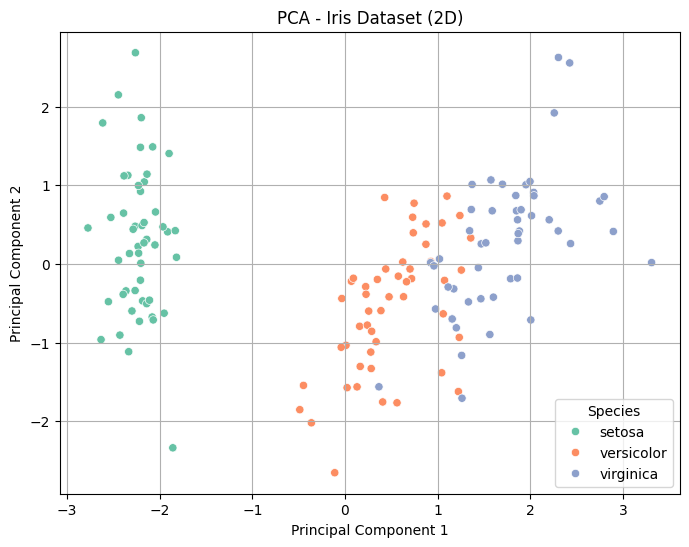

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
iris = load_iris()
X = iris.data  # The features
y = iris.target  # The labels
feature_names = iris.feature_names
target_names = iris.target_names


df = pd.DataFrame(X, columns=feature_names)
df['Species'] = [target_names[i] for i in y]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 5), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)


df_pca = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_pca['Species'] = df['Species']


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Species', palette='Set2')
plt.title('PCA - Iris Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
